# 匯入需要的套件 & 讀利用pandas讀檔

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import sklearn.metrics as sm

data = pd.read_csv("HousingData.csv")

In [2]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# 查看是否有缺失值，並將缺失值以平均數填入

In [3]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [4]:
data['CRIM'].fillna(data['CRIM'].mean(), inplace = True)
data['ZN'].fillna(data['ZN'].mean(), inplace = True)
data['INDUS'].fillna(data['INDUS'].mean(), inplace = True)
data['CHAS'].fillna(data['CHAS'].mean(), inplace = True)
data['AGE'].fillna(data['AGE'].mean(), inplace = True)
data['LSTAT'].fillna(data['LSTAT'].mean(), inplace = True)
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# 運用熱度圖簡單看看相關係數，可看出RM & LSTAT最有相關

Text(0.5, 1.0, 'Correlation Matrix')

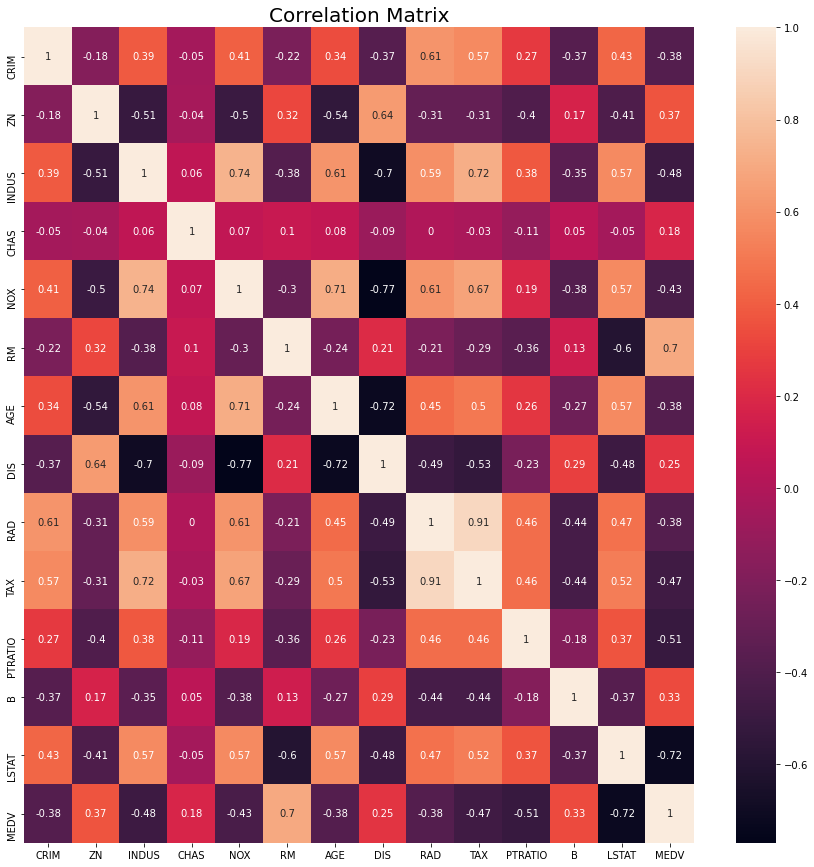

In [5]:
plt.figure(figsize=(15, 15))
correlation_matrix = data.corr().round(2)
# annot = True 讓我們可以把數字標進每個格子裡
sns.heatmap(data=correlation_matrix, annot = True)
plt.title('Correlation Matrix', fontsize=20)

# 選取RM作為特徵，並畫出散點圖和迴歸線，並且評估模型後R^2為0.588，代表模型大約可解釋58.8%的資料

In [6]:
x1 = pd.DataFrame(data['RM'] , columns = ['RM'])
y1 = data['MEDV']

X_train , X_test , y_train , y_test = train_test_split(x1 , y1 , test_size = 0.2 , random_state = 1)

In [8]:
regression_x = data['RM'].values.reshape(-1, 1)
regression_y = data['MEDV'].values

sc = StandardScaler()
X_std = sc.fit_transform(regression_x)

lr = LinearRegression()
lr.fit(X_std, y1)

LinearRegression()

R2 score test : 0.588


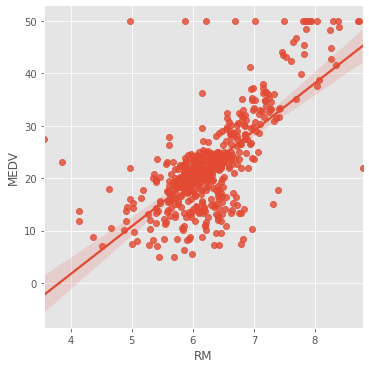

In [11]:
plt.style.use('ggplot')
sns.lmplot(x = "RM" , y = "MEDV" , data = data , fit_reg = True)

slr = LinearRegression()

slr.fit(X_train , y_train)
y_test_pred = slr.predict(X_test)

print('R2 score test : %.3f' %(r2_score(y_test , y_test_pred)))

# 選取RM & LSTAT作為特徵建立模型，評估模型後R^2為0.666，代表模型大約可解釋66.6%的資料

In [121]:
x = pd.DataFrame(np.c_[data['LSTAT'] , data['RM']] , columns = ['LSTAT' , 'RM'])
y = data['MEDV']

X_train , X_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 1)

In [122]:
# Modeling
reg = LinearRegression()
# 學習/訓練Fitting linear model
reg.fit(X_train , y_train)
# 預測結果Predicting using the linear model
reg.predict(X_test)
# 真實結果：y_test
# 測試準確度：
print('R2 score test : %.3f'%(reg.score(X_test, y_test)))

R2 score test : 0.666


# 列出LSTAT & RM與MEDV的相關係數

In [126]:
coeff_df = pd.DataFrame(reg.coef_, X_train.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
LSTAT,-0.639501
RM,4.833187


# 算出誤差MSE還有截距intercept

In [147]:
y_test_pred = reg.predict(X_test)
MSE = mean_squared_error(y_test , y_test_pred)
intercept = float(reg.intercept_)

# 隨機抽兩個數字，並且運用截距、誤差還有相關係數的關係式，利用抽出來的數字隨機選兩家房價做預測

In [205]:
import random
n1 = random.randint(0 , 505)
n2 = random.randint(0 , 505)
print(n1 , n2)

297 176


In [209]:
MEDIV_1 = intercept + reg.coef_[0] * float(data.iloc[n1]['LSTAT']) + reg.coef_[1] * float(data.iloc[n1]['RM']) + MSE
MEDIV_2 = intercept + reg.coef_[0] * float(data.iloc[n2]['LSTAT']) + reg.coef_[1] * float(data.iloc[n2]['RM']) + MSE

In [210]:
print(MEDIV_1 , MEDIV_2)

51.32670476253082 56.102678187287495


In [197]:
data.drop("MEDV", inplace=True, axis=1)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000


In [244]:
df1 = pd.DataFrame(data=data.iloc[n1]).T
df2 = pd.DataFrame(data=data.iloc[n2]).T

In [251]:
from pandas import Series
df = pd.concat([df1,df2],axis=0, ignore_index=True)
df.index = Series(['House A' , 'House B'])

# House A , B的房價預測與其他變數如下

In [253]:
print("The predicted price of House A is {:.3f}" .format(MEDIV_1))
print("The predicted price of House B is {:.3f}" .format(MEDIV_2))
df

The predicted price of House A is 51.327
The predicted price of House B is 56.103


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
House A,0.14103,0.0,11.083992,0.0,0.437,5.79,58.0,6.3200,4.0,289.0,16.0,396.90,15.84
House B,0.07022,0.0,4.050000,0.0,0.510,6.02,47.2,3.5549,5.0,296.0,16.6,393.23,10.11
